## k-近邻算法 <small>采用测量不同特征值之间的距离方法进行分类</small>
- ### 优点：精度高、对异常值不敏感、无数据输入假定
- ### 缺点：计算复杂度高、空间复杂度高。
- ### 适用数据范围：数值型和标称型。

## k-近临算法的一般流程
- ### 收集数据：可以使用任何方法。
- ### 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
- ### 分析数据：可以使用任何方法。
- ### 训练算法：此步骤不适用于k-近邻算法。
- ### 测试算法：计算错误率。
- ### 使用算法：首先需要输入样本数据和结构化输出结果，然后运行k-近临算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

In [3]:
import numpy as np
import operator 

def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

In [9]:
import pandas as pd

df = pd.DataFrame(group)
df

,0,1
0,1.0,1.1
1,1.0,1.0
2,0.0,0.0
3,0.0,0.1


In [12]:
df['label'] = labels
df

,0,1,label
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,0.1,B


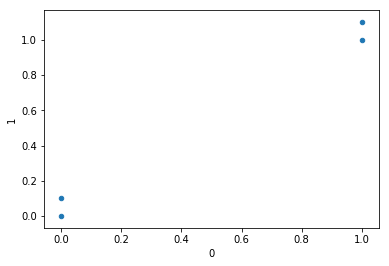

In [27]:
df.plot(x=0, y=1, kind='scatter')

## KNN 算法
- ### 计算已知类别数据集中的点与当前点之间的距离
- ### 按照距离递增次序排序
- ### 选取与当前点距离最小的k个点
- ### 确定前k个点所在类别的出现频率
- ### 返回前k个点出现频率最高的类别作为当前点的预测分类

In [44]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # 距离计算
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    # 选择距离最小的 k 个点
    classCount = {}
    for i in range(k) : 
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [45]:
classify0([0, 0], group, labels, 3)

'B'

## 示例：使用k-近邻算法改进约会网站的配对效果

## 示例：手写识别系统